"""
# classification steps:

1. create dataframe -> pd.read_csv(), pd.read_excel()

2. EDA -> Univariate analysis, Bi/Multivariate analysis

3. Preprocessing of the data
    1. feature selection --> domain knowledge 
    2. Handling the missing values
    3. outlier handling [optional]
    
3. Converting Categorical Values to Numerical -> 
    get.dummies, 
    label_encoder, 
    onehotencoder, 
    manual label encoding
    
4. Create X and Y variables -> values, iloc


5. Data Partiation -> train and test 

6. Data Normalisation -> standardisation, Minmaxscaler

7. Building the model:
    1. create the model --> obj= Algoname()
    2. Train the model --> obj.fit(Xtrain, Ytrain)
    3. Predictioin --> obj.predict(Xtest)
    
8. Evalation Model:
    
    1. confusion matrix 
    2. accuracy score 
    3. classification report 
    4. AUC or ROC
    
9. Tuning the model --> feature selection method, parameter tunning, another model, kfold cross validation

10. Deployement (api building)

"""

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
adult_df=pd.read_csv(r'adult_data.csv',header = None , delimiter = ' *, *')
adult_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:

adult_df.shape
adult_df.info()
adult_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
adult_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# EDA

In [5]:
def create_piechart(data, column):
    """
    Objective
    ---------- 
    Create Pichart for Categorical varaibles present in Pandas Dataframe
    
    parameters
    ----------
    data: this is pandas dataframe
    column: this is column name which is used to create plot
        
    returns
    ----------
    this will show piechart
    
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
   
    plt.pie(sizes, 
            labels=labels, 
            autopct='%1.2f%%',
            shadow=False, 
            startangle=45)
    
    plt.axis('equal')  
    plt.title("Piechart - {}".format(column))
    plt.show()
    
    
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
    
    return missing_data

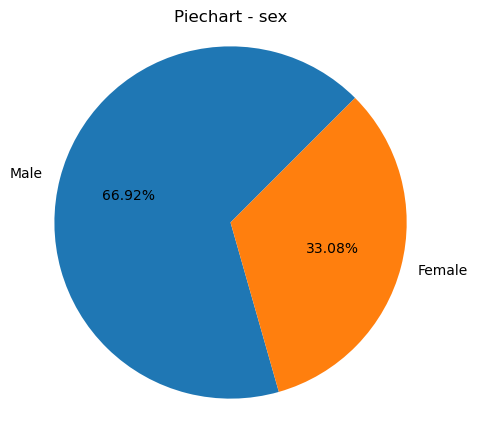

In [6]:
plt.figure(figsize=(5,5))
create_piechart(adult_df, "sex")

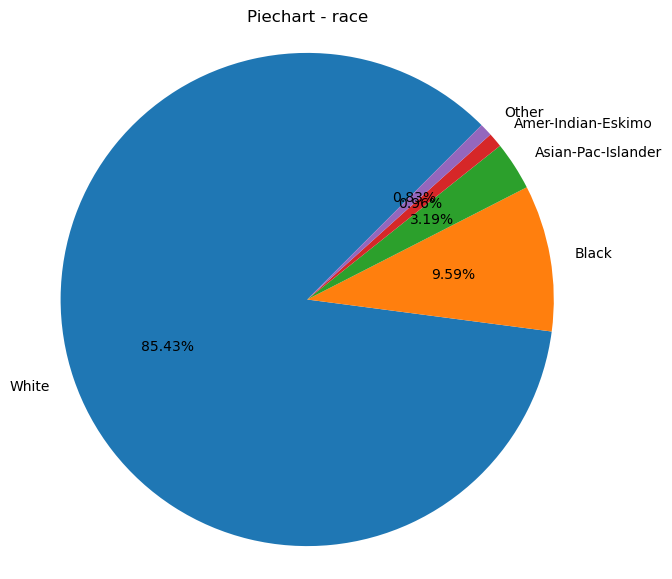

In [7]:
plt.figure(figsize=(7,7))
create_piechart(adult_df, "race")

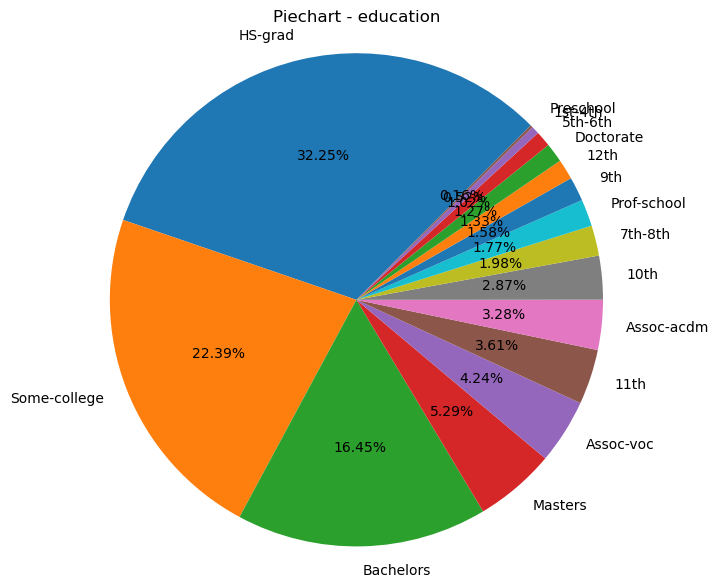

In [8]:
plt.figure(figsize=(7,7))
create_piechart(adult_df, "education")

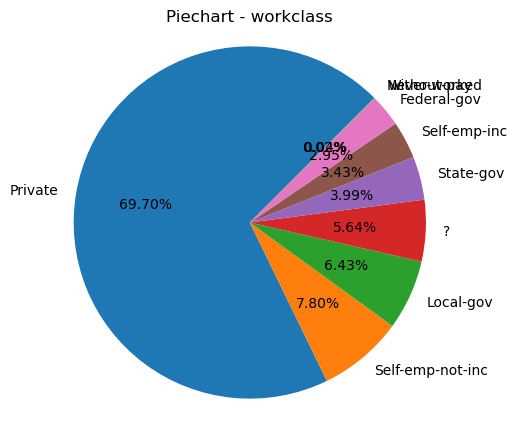

In [9]:
plt.figure(figsize=(5,5))
create_piechart(adult_df, "workclass")

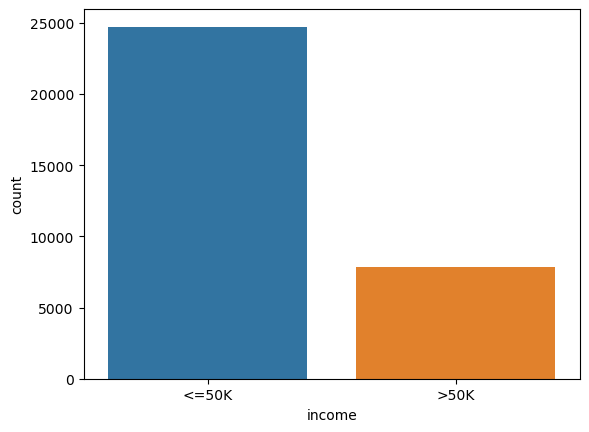

In [10]:
sns.countplot(x=adult_df["income"])
plt.show()

In [11]:
adult_df.duplicated().sum()

24

In [12]:
adult_df.drop_duplicates(inplace=True)
adult_df.shape

(32537, 15)

In [13]:
adult_df.drop(["education","fnlwgt"],axis=1,inplace=True)
adult_df.shape

(32537, 13)

In [14]:
adult_df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [15]:
adult_df=adult_df.replace(['?'], np.nan)



In [16]:
missing_data(adult_df)

,Total,Percent,Data_Type
occupation,1843,5.66,object
workclass,1836,5.64,object
native_country,582,1.79,object
age,0,0.00,int64
education_num,0,0.00,int64
marital_status,0,0.00,object
relationship,0,0.00,object
race,0,0.00,object
sex,0,0.00,object
capital_gain,0,0.00,int64


<Axes: >

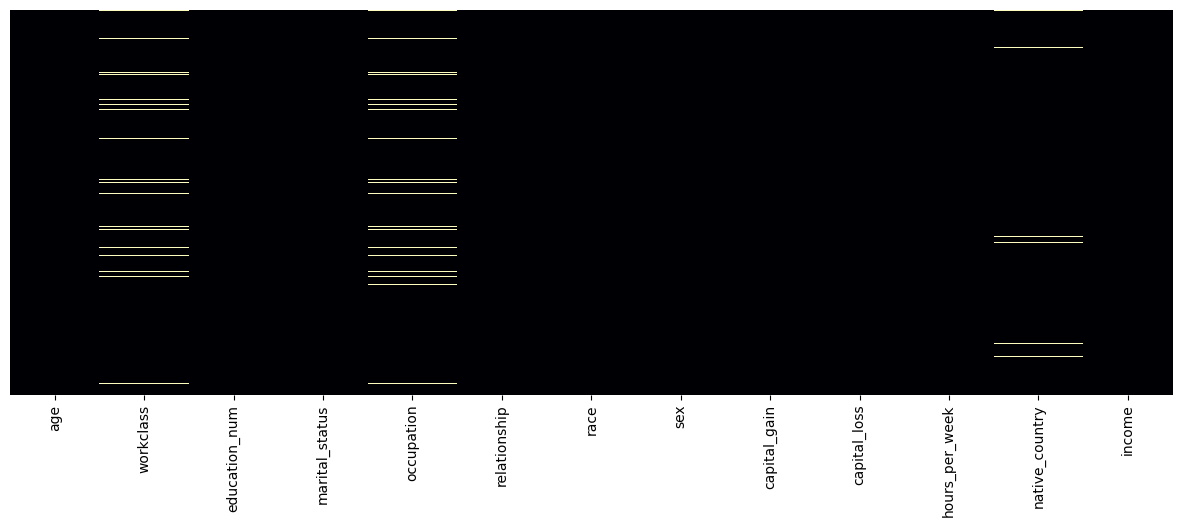

In [17]:
plt.figure(figsize=(15,5))
sns.heatmap(adult_df.isnull(), 
            cbar = False, 
            yticklabels=False, 
            cmap="magma" )

In [18]:
for i in adult_df.columns:
    print({i:adult_df[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [19]:
adult_df.replace('?', np.nan,inplace= True)

In [20]:
adult_df.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [21]:
# replace the missing values with mode values 
for value in['workclass','occupation','native_country']:
    adult_df[value].fillna(adult_df[value].mode()[0],inplace=True)  

In [22]:
adult_df.workclass.mode([0])


0    Private
Name: workclass, dtype: object

In [23]:
adult_df.occupation.mode([0])


0    Prof-specialty
Name: occupation, dtype: object

In [24]:
adult_df.native_country.mode([0])

0    United-States
Name: native_country, dtype: object

In [25]:
adult_df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [26]:
adult_df.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns to encode
categorical_cols = [
    'workclass', 'marital_status', 'occupation',
    'relationship', 'race', 'sex', 'native_country', 'income'
]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    adult_df[col] = le.fit_transform(adult_df[col])

In [28]:
adult_df.head(10)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
5,37,3,14,2,3,5,4,0,0,0,40,38,0
6,49,3,5,3,7,1,2,0,0,0,16,22,0
7,52,5,9,2,3,0,4,1,0,0,45,38,1
8,31,3,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,13,2,3,0,4,1,5178,0,40,38,1


# Splitting X and Y

In [29]:
# Assuming your DataFrame is named df
X = adult_df.iloc[:, :-1]  # Features (all columns except the last one)
Y = adult_df.iloc[:, -1]   # Target variable (the last column)

# Applying standard scalar

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
adult_df = scaler.fit_transform(X)
adult_df = scaler.transform(X)

# Splitting Test and train data

In [31]:
from sklearn.model_selection import train_test_split
#split the data into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

# applying all the classification algorithm

In [32]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN Classifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model_performance(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification report (precision, recall, f1-score)
    report = classification_report(Y_test, Y_pred)
    print("Classification Report:\n", report)

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model_performance(model, X_train, X_test, Y_train, Y_test)


Evaluating Logistic Regression
Accuracy: 0.8090
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7396
           1       0.71      0.36      0.48      2366

    accuracy                           0.81      9762
   macro avg       0.77      0.66      0.68      9762
weighted avg       0.80      0.81      0.78      9762

Evaluating Decision Tree
Accuracy: 0.8143
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      7396
           1       0.62      0.60      0.61      2366

    accuracy                           0.81      9762
   macro avg       0.75      0.74      0.74      9762
weighted avg       0.81      0.81      0.81      9762

Evaluating Random Forest
Accuracy: 0.8534
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7396
           1       0.74      0.61

# Tuning the algos

from sklearn.model_selection import GridSearchCV

# Sample hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 15]
    },
    "KNN Classifier": {
        'n_neighbors': [5, 10]
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.1, 0.2]
    }
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier()
}

# Assuming X_train, Y_train, X_test, Y_test are defined
best_models = {}

for name, model in models.items():
    param_grid = param_grids.get(name, {})
    
    # Tune model using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Evaluate the best model
    Y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    
    print(f"Evaluating {name}:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(Y_test, Y_pred))

In [38]:
Y.value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [39]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))



Before OverSampling, counts of label '1':  5473
Before OverSampling, counts of label '0':  17302
After OverSampling, the shape of train_X:  (34604, 12)
After OverSampling, the shape of train_y:  (34604,)
After OverSampling, counts of label '1':  17302
After OverSampling, counts of label '0':  17302


# Applying algo after SMOTE

In [40]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN Classifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model_performance(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification report (precision, recall, f1-score)
    report = classification_report(Y_test, Y_pred)
    print("Classification Report:\n", report)

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model_performance(model, X_train, X_test, Y_train, Y_test)


Evaluating Logistic Regression
Accuracy: 0.8090
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7396
           1       0.71      0.36      0.48      2366

    accuracy                           0.81      9762
   macro avg       0.77      0.66      0.68      9762
weighted avg       0.80      0.81      0.78      9762

Evaluating Decision Tree
Accuracy: 0.8164
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      7396
           1       0.63      0.60      0.61      2366

    accuracy                           0.82      9762
   macro avg       0.75      0.74      0.75      9762
weighted avg       0.81      0.82      0.82      9762

Evaluating Random Forest
Accuracy: 0.8534
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7396
           1       0.74      0.61

# Adjusting the threshold

In [44]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np

# Train and evaluate the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, Y_train)

# Predict class probabilities for the test set
y_pred_prob = xgb_model.predict_proba(X_test)

# Print predicted probabilities for the positive class
print("Predicted probabilities for the positive class:\n", y_pred_prob)

# Iterate over threshold values from 0.4 to 0.6 with a step of 0.01
for threshold in np.arange(0.4, 0.61, 0.01):
    # Classify based on the current threshold
    y_pred_class = np.where(y_pred_prob[:, 1] > threshold, 1, 0)
    
    # Calculate the confusion matrix
    cfm = confusion_matrix(Y_test, y_pred_class)
    
    # Calculate total errors
    total_errors = round(cfm[0, 1] + cfm[1, 0])
    
    # Print errors and confusion matrix details
    print(f"Threshold: {round(threshold, 2)} - Total Errors: {total_errors}, Type 2 Error: {cfm[1, 0]}, Type 1 Error: {cfm[0, 1]}")


Predicted probabilities for the positive class:
 [[9.6906096e-01 3.0939016e-02]
 [9.9988329e-01 1.1671806e-04]
 [9.7776741e-01 2.2232590e-02]
 ...
 [9.8177373e-01 1.8226273e-02]
 [9.9881792e-01 1.1820766e-03]
 [9.7914624e-01 2.0853758e-02]]
Threshold: 0.4 - Total Errors: 1223, Type 2 Error: 584, Type 1 Error: 639
Threshold: 0.41 - Total Errors: 1213, Type 2 Error: 596, Type 1 Error: 617
Threshold: 0.42 - Total Errors: 1207, Type 2 Error: 619, Type 1 Error: 588
Threshold: 0.43 - Total Errors: 1203, Type 2 Error: 634, Type 1 Error: 569
Threshold: 0.44 - Total Errors: 1194, Type 2 Error: 650, Type 1 Error: 544
Threshold: 0.45 - Total Errors: 1191, Type 2 Error: 673, Type 1 Error: 518
Threshold: 0.46 - Total Errors: 1190, Type 2 Error: 693, Type 1 Error: 497
Threshold: 0.47 - Total Errors: 1183, Type 2 Error: 712, Type 1 Error: 471
Threshold: 0.48 - Total Errors: 1178, Type 2 Error: 732, Type 1 Error: 446
Threshold: 0.49 - Total Errors: 1181, Type 2 Error: 754, Type 1 Error: 427
Threshold:

# 0.48 is the optimum threshold lowest error

In [46]:
# Predict class probabilities for the test set
y_pred_prob = xgb_model.predict_proba(X_test)

# Print predicted probabilities for the positive class
print(y_pred_prob)

# Adjusted threshold
threshold = 0.48

# Classify based on the threshold
y_pred_class = (y_pred_prob[:, 1] > threshold).astype(int)

# Print the predicted classes
print(y_pred_class)


[[9.6906096e-01 3.0939016e-02]
 [9.9988329e-01 1.1671806e-04]
 [9.7776741e-01 2.2232590e-02]
 ...
 [9.8177373e-01 1.8226273e-02]
 [9.9881792e-01 1.1820766e-03]
 [9.7914624e-01 2.0853758e-02]]
[0 0 0 ... 0 0 0]


In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

print(classification_report(Y_test, y_pred_class))

[[6950  446]
 [ 732 1634]]
Accuracy of the model:  0.8793280065560336
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7396
           1       0.79      0.69      0.74      2366

    accuracy                           0.88      9762
   macro avg       0.85      0.82      0.83      9762
weighted avg       0.88      0.88      0.88      9762



# AUC and ROC curve

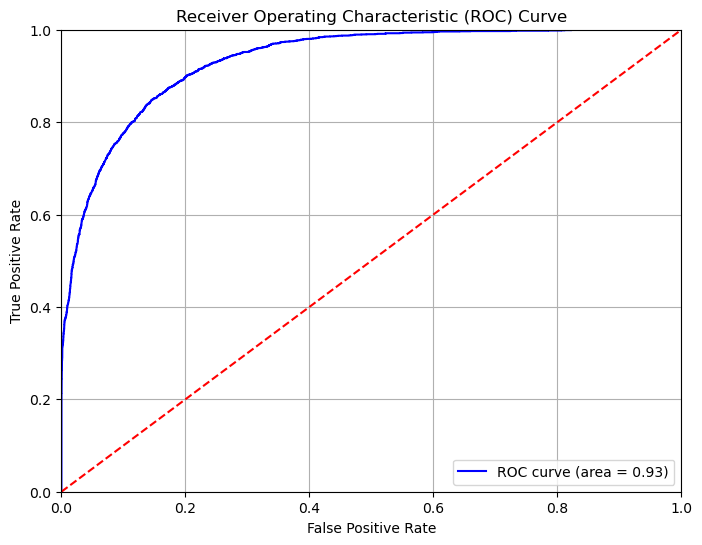

In [48]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Train the XGBoost classifier (if not already done)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, Y_train)

# Predict class probabilities for the test set
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# PREDICTIONS

In [51]:
# Predict class labels for the test set
y_pred = xgb_model.predict(X_test)

# Print the predicted labels
print("Predicted Labels:\n", y_pred)

Predicted Labels:
 [0 0 0 ... 0 0 0]


In [53]:
# Predict class probabilities for the test set
y_pred_prob = xgb_model.predict_proba(X_test)

# Print the predicted probabilities for both classes
print("Predicted Probabilities:\n", y_pred_prob)

Predicted Probabilities:
 [[9.6906096e-01 3.0939016e-02]
 [9.9988329e-01 1.1671806e-04]
 [9.7776741e-01 2.2232590e-02]
 ...
 [9.8177373e-01 1.8226273e-02]
 [9.9881792e-01 1.1820766e-03]
 [9.7914624e-01 2.0853758e-02]]


In [56]:
# Create a DataFrame to store predictions and actual values
predictions_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred
})

# Convert DataFrame to Excel
predictions_df.to_excel('Adult_predictions.xlsx', index=False)

print("Predictions have been saved to 'Adult_predictions.xlsx'")

Predictions have been saved to 'Adult_predictions.xlsx'


# UNSEEN DATA

In [58]:
adult_df_new=pd.read_csv(r"C:\Users\razas\Downloads\Logistic Regression\adult_test.csv",header = None , delimiter = ' *, *')
adult_df_new.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [59]:
adult_df_new.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
adult_df_new.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [60]:

adult_df.shape
adult_df.info()
adult_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16281 non-null  int64 
 1   1       16281 non-null  object
 2   2       16281 non-null  int64 
 3   3       16281 non-null  object
 4   4       16281 non-null  int64 
 5   5       16281 non-null  object
 6   6       16281 non-null  object
 7   7       16281 non-null  object
 8   8       16281 non-null  object
 9   9       16281 non-null  object
 10  10      16281 non-null  int64 
 11  11      16281 non-null  int64 
 12  12      16281 non-null  int64 
 13  13      16281 non-null  object
 14  14      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,16281.000000,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,NaN,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,38.767459,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,13.849187,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# PREDICTION

In [61]:
# Predict class labels for the test set
y_pred = xgb_model.predict(X_test)

# Print the predicted labels
print("Predicted Labels:\n", y_pred)

Predicted Labels:
 [0 0 0 ... 0 0 0]


In [62]:
# Predict class probabilities for the test set
y_pred_prob = xgb_model.predict_proba(X_test)

# Print the predicted probabilities for both classes
print("Predicted Probabilities:\n", y_pred_prob)

Predicted Probabilities:
 [[9.6906096e-01 3.0939016e-02]
 [9.9988329e-01 1.1671806e-04]
 [9.7776741e-01 2.2232590e-02]
 ...
 [9.8177373e-01 1.8226273e-02]
 [9.9881792e-01 1.1820766e-03]
 [9.7914624e-01 2.0853758e-02]]


In [63]:
# Create a DataFrame to store predictions and actual values
predictions_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred
})

# Convert DataFrame to Excel
predictions_df.to_excel('Adult_predictions_unseen_data.xlsx', index=False)

print("Predictions have been saved to 'Adult_predictions_unseen_data.xlsx'")

Predictions have been saved to 'Adult_predictions_unseen_data.xlsx'


# PROJECT ENDS HERE